In [27]:
import requests 
import pandas as pd 
import numpy as np 

In [28]:
import pandas as pd

country_codes = ['IN', 'CN', 'US', 'ZA', 'NL']

dfs = []
for code in country_codes:
    df = pd.read_csv(f"WID_data_{code}.csv", sep=";")
    dfs.append(df)

df_combined = pd.concat(dfs, ignore_index=True)

print(df_combined.head(10))
print(df_combined.describe())



  country    variable percentile  year       value  age pop
0      IN  ehfcari999     p0p100  1990  312.117210  999   i
1      IN  ehfcari999     p0p100  1991  328.894016  999   i
2      IN  ehfcari999     p0p100  1992  355.461499  999   i
3      IN  ehfcari999     p0p100  1993  358.065985  999   i
4      IN  ehfcari999     p0p100  1994  370.890249  999   i
5      IN  ehfcari999     p0p100  1995  386.577885  999   i
6      IN  ehfcari999     p0p100  1996  424.230646  999   i
7      IN  ehfcari999     p0p100  1997  435.690896  999   i
8      IN  ehfcari999     p0p100  1998  444.676957  999   i
9      IN  ehfcari999     p0p100  1999  489.647561  999   i
               year         value           age
count  4.219340e+06  4.219340e+06  4.219340e+06
mean   1.977690e+03  1.476494e+11  9.898519e+02
std    4.207889e+01  2.610589e+14  6.274602e+01
min    1.800000e+03 -5.036594e+17  1.000000e+00
25%    1.960000e+03  4.480000e-02  9.920000e+02
50%    1.992000e+03  1.965195e+01  9.920000e+02
75% 

In [29]:
#filtering for valriable = "sptincj999" to filter out the income share stats
income_df = df_combined[df_combined['variable'] == 'sptincj999'].copy()
income_df.reset_index(drop=True, inplace=True)
pattern = r'^p(\d+\.?\d*)p(\d+\.?\d*)$'

income_df[['p_start', 'p_end']] = (
    income_df['percentile']
    .str.extract(pattern)
    .astype(float)
)
# Filtering top 10%, top 1%, top 0.1%, and bottom 50%
top_10 = income_df[(income_df['p_start'] == 90) & (income_df['p_end'] == 100)].reset_index(drop=True)
top_1 = income_df[(income_df['p_start'] == 99) & (income_df['p_end'] == 100)].reset_index(drop=True)
top_0_1 = income_df[(income_df['p_start'] == 99.9) & (income_df['p_end'] == 100)].reset_index(drop=True)
bottom_50 = income_df[(income_df['p_start'] == 0) & (income_df['p_end'] == 50)].reset_index(drop=True)

df_income_summary = pd.concat([top_10, top_1, top_0_1, bottom_50], ignore_index=True)
df_income_summary['income_distribution'] = np.where(df_income_summary['p_start'] == 90, 'top_10%',
                                        np.where(df_income_summary['p_start'] == 99, 'top_1%',
                                        np.where(df_income_summary['p_start'] == 99.9, 'top_0.1%',
                                        np.where(df_income_summary['p_start'] == 0, 'bottom_50%', 'other'))))
df_income_summary

,country,variable,percentile,year,value,age,pop,p_start,p_end,income_distribution
0,IN,sptincj999,p90p100,1820,0.4800,999,j,90.0,100.0,top_10%
1,IN,sptincj999,p90p100,1850,0.5000,999,j,90.0,100.0,top_10%
2,IN,sptincj999,p90p100,1880,0.5460,999,j,90.0,100.0,top_10%
3,IN,sptincj999,p90p100,1900,0.5376,999,j,90.0,100.0,top_10%
4,IN,sptincj999,p90p100,1910,0.4480,999,j,90.0,100.0,top_10%
...,...,...,...,...,...,...,...,...,...,...
1475,NL,sptincj999,p0p50,2020,0.2370,999,j,0.0,50.0,bottom_50%
1476,NL,sptincj999,p0p50,2021,0.2358,999,j,0.0,50.0,bottom_50%
1477,NL,sptincj999,p0p50,2022,0.2278,999,j,0.0,50.0,bottom_50%
1478,NL,sptincj999,p0p50,2023,0.2197,999,j,0.0,50.0,bottom_50%


In [30]:
df_wide = df_income_summary.pivot_table(
    index=['country','year'], 
    columns='income_distribution', 
    values='value'
).reset_index(drop=False)
df_wide 

income_distribution,country,year,bottom_50%,top_0.1%,top_1%,top_10%
0,CN,1820,0.1855,0.0527,0.1616,0.4648
1,CN,1850,0.1812,0.0572,0.1735,0.4772
2,CN,1880,0.1594,0.0560,0.1761,0.5124
3,CN,1900,0.1571,0.0573,0.1784,0.5161
4,CN,1910,0.1691,0.0720,0.2026,0.5120
...,...,...,...,...,...,...
365,ZA,2020,0.0627,0.0574,0.1921,0.6508
366,ZA,2021,0.0627,0.0574,0.1921,0.6508
367,ZA,2022,0.0627,0.0574,0.1921,0.6508
368,ZA,2023,0.0627,0.0574,0.1921,0.6508


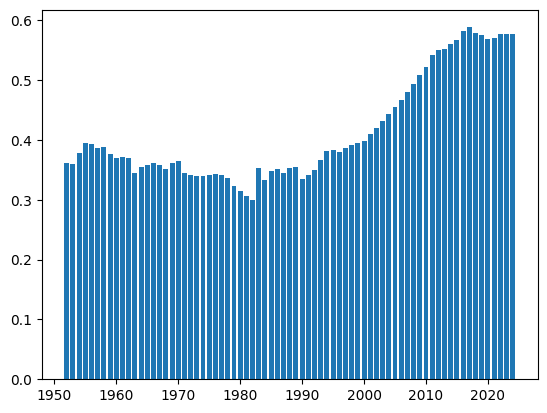

In [31]:
import matplotlib.pyplot as plt
df_income_summary = df_income_summary[df_income_summary['year']>=1952]
df_income = df_income_summary[(df_income_summary['income_distribution']=='bottom_50%') | (df_income_summary['income_distribution']=='top_10%') | (df_income_summary['income_distribution']=='top_1%')]

for country in ['IN']:
    df_plot = df_income[df_income['country']== country]
    plt.bar(df_plot['year'], df_plot['value'])
    plt.show()

In [32]:
df_income_summary.head()

,country,variable,percentile,year,value,age,pop,p_start,p_end,income_distribution
10,IN,sptincj999,p90p100,1952,0.3610,999,j,90.0,100.0,top_10%
11,IN,sptincj999,p90p100,1953,0.3604,999,j,90.0,100.0,top_10%
12,IN,sptincj999,p90p100,1954,0.3788,999,j,90.0,100.0,top_10%
13,IN,sptincj999,p90p100,1955,0.3956,999,j,90.0,100.0,top_10%
14,IN,sptincj999,p90p100,1956,0.3925,999,j,90.0,100.0,top_10%


   country    variable percentile  year   value  age pop  p_start  p_end  \
10      IN  sptincj999    p90p100  1952  0.3610  999   j     90.0  100.0   
11      IN  sptincj999    p90p100  1953  0.3604  999   j     90.0  100.0   
12      IN  sptincj999    p90p100  1954  0.3788  999   j     90.0  100.0   
13      IN  sptincj999    p90p100  1955  0.3956  999   j     90.0  100.0   
14      IN  sptincj999    p90p100  1956  0.3925  999   j     90.0  100.0   

   income_distribution  
10             top_10%  
11             top_10%  
12             top_10%  
13             top_10%  
14             top_10%  


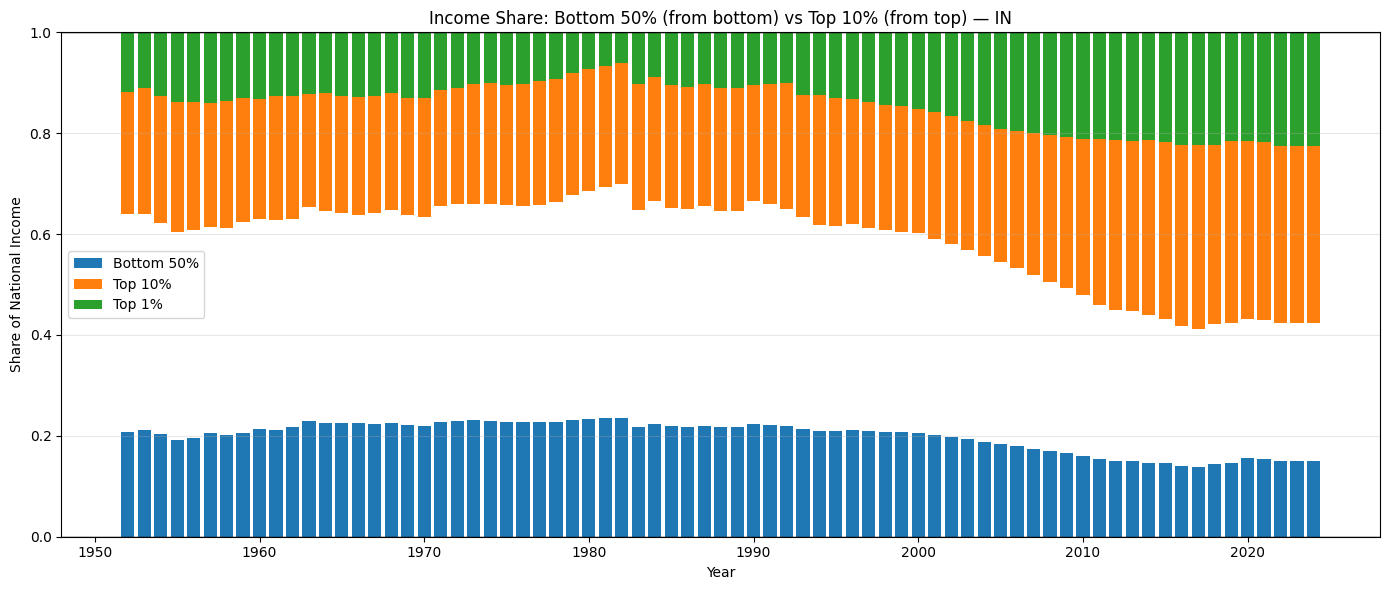

   country    variable percentile  year   value  age pop  p_start  p_end  \
92      CN  sptincj999    p90p100  1960  0.2670  999   j     90.0  100.0   
93      CN  sptincj999    p90p100  1970  0.2670  999   j     90.0  100.0   
94      CN  sptincj999    p90p100  1978  0.2781  999   j     90.0  100.0   
95      CN  sptincj999    p90p100  1979  0.2782  999   j     90.0  100.0   
96      CN  sptincj999    p90p100  1980  0.2789  999   j     90.0  100.0   

   income_distribution  
92             top_10%  
93             top_10%  
94             top_10%  
95             top_10%  
96             top_10%  


<Figure size 640x480 with 0 Axes>

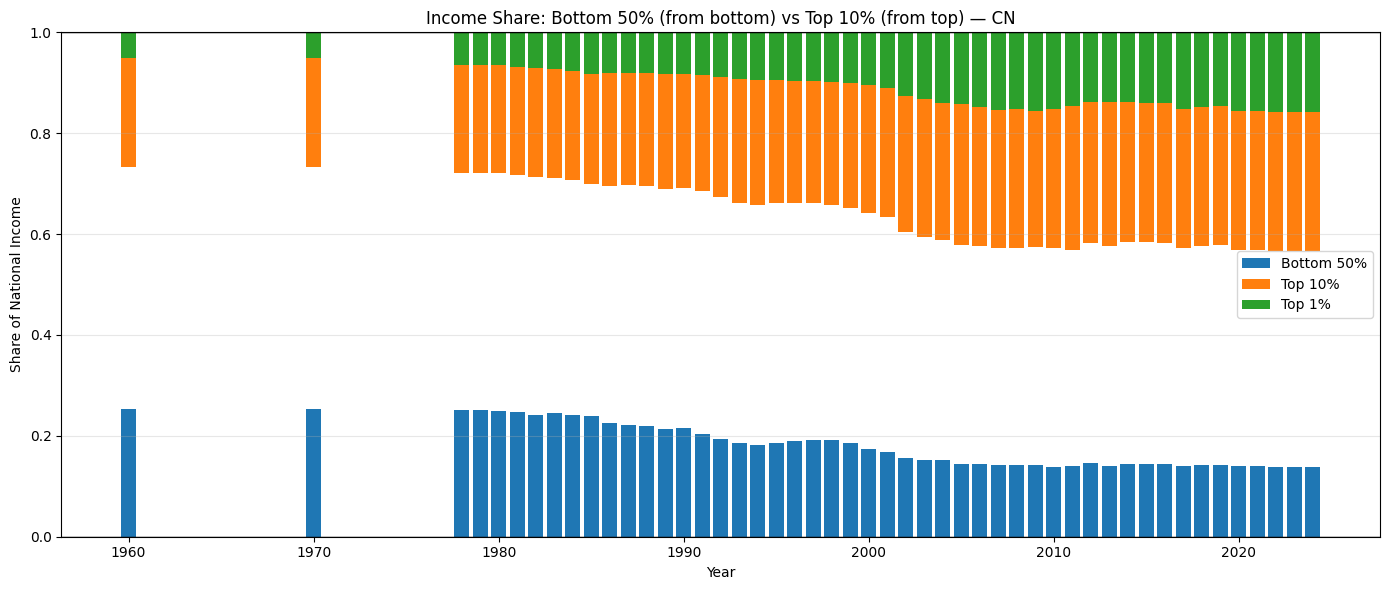

    country    variable percentile  year   value  age pop  p_start  p_end  \
185      US  sptincj999    p90p100  1952  0.3664  999   j     90.0  100.0   
186      US  sptincj999    p90p100  1953  0.3563  999   j     90.0  100.0   
187      US  sptincj999    p90p100  1954  0.3601  999   j     90.0  100.0   
188      US  sptincj999    p90p100  1955  0.3670  999   j     90.0  100.0   
189      US  sptincj999    p90p100  1956  0.3574  999   j     90.0  100.0   

    income_distribution  
185             top_10%  
186             top_10%  
187             top_10%  
188             top_10%  
189             top_10%  


<Figure size 640x480 with 0 Axes>

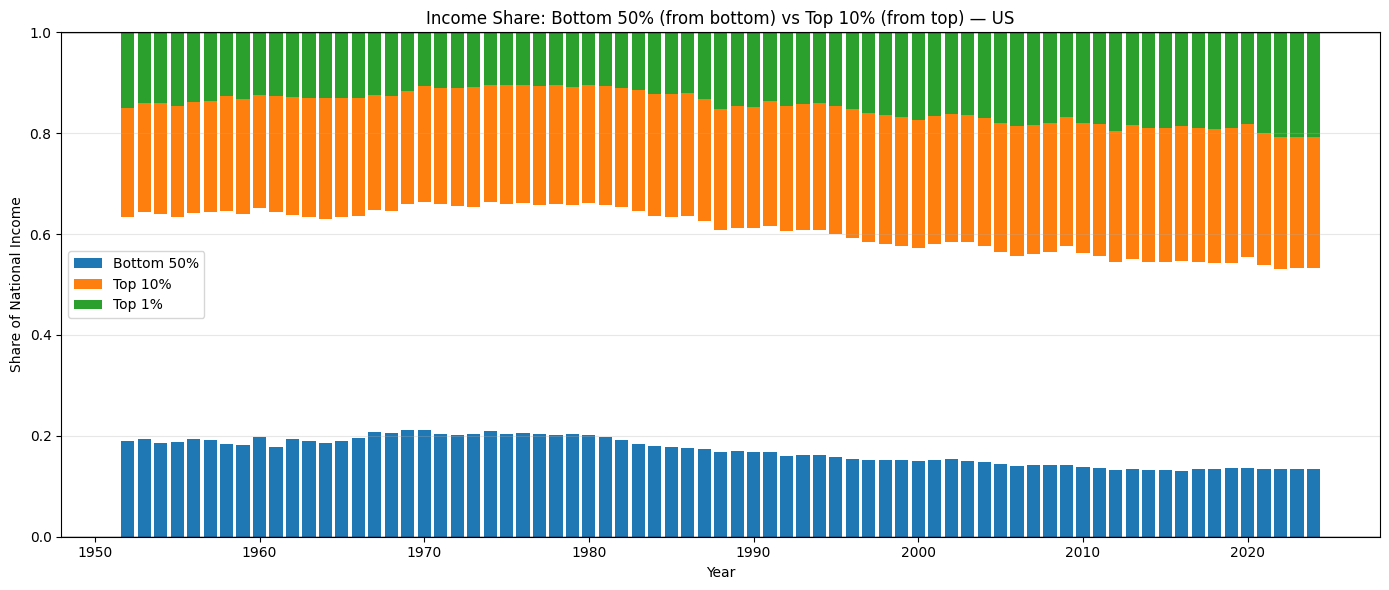

    country    variable percentile  year   value  age pop  p_start  p_end  \
323      NL  sptincj999    p90p100  1960  0.3287  999   j     90.0  100.0   
324      NL  sptincj999    p90p100  1970  0.3037  999   j     90.0  100.0   
325      NL  sptincj999    p90p100  1980  0.2673  999   j     90.0  100.0   
326      NL  sptincj999    p90p100  1981  0.2684  999   j     90.0  100.0   
327      NL  sptincj999    p90p100  1982  0.2696  999   j     90.0  100.0   

    income_distribution  
323             top_10%  
324             top_10%  
325             top_10%  
326             top_10%  
327             top_10%  


<Figure size 640x480 with 0 Axes>

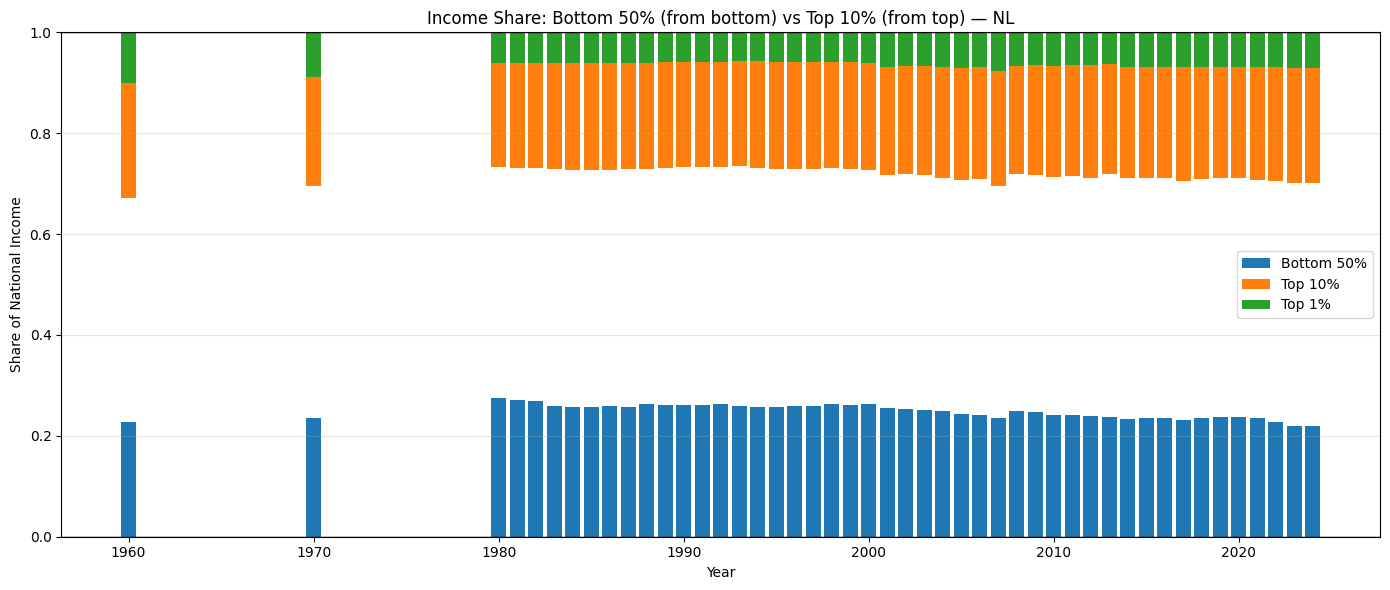

    country    variable percentile  year   value  age pop  p_start  p_end  \
267      ZA  sptincj999    p90p100  1960  0.5864  999   j     90.0  100.0   
268      ZA  sptincj999    p90p100  1970  0.5869  999   j     90.0  100.0   
269      ZA  sptincj999    p90p100  1980  0.4585  999   j     90.0  100.0   
270      ZA  sptincj999    p90p100  1981  0.4585  999   j     90.0  100.0   
271      ZA  sptincj999    p90p100  1982  0.4585  999   j     90.0  100.0   

    income_distribution  
267             top_10%  
268             top_10%  
269             top_10%  
270             top_10%  
271             top_10%  


<Figure size 640x480 with 0 Axes>

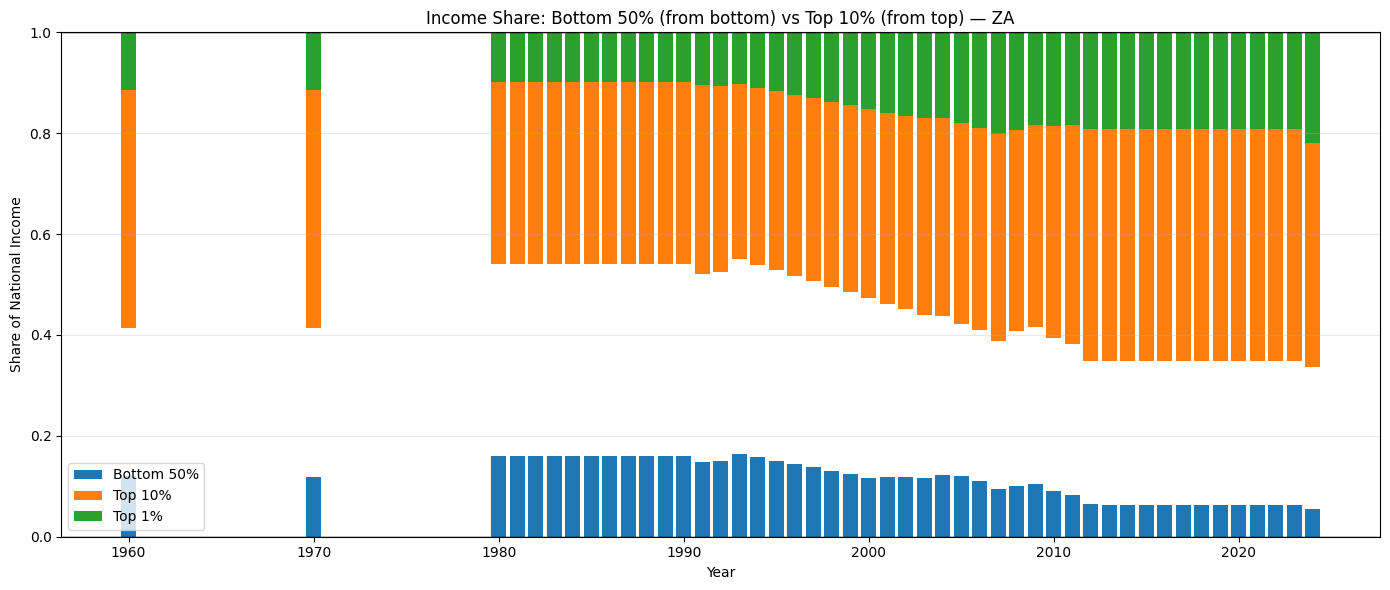

<Figure size 640x480 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt

country_code = ['IN', 'CN', 'US', 'NL', 'ZA']
for code in country_code:
    # --- filter + pivot like you already did ---
    # df_country = df_wide[]
    df_plot = df_income_summary[(df_income_summary['country'] == code) & 
        (df_income_summary['year'] >= 1952)
    ]
    print(df_plot.head())
    df_country = df_plot.pivot(
            index='year',
            columns='income_distribution',
            values='value'
        )
    #[['bottom_50%', 'top_10%', 'top_1%']]   # ensure order

    years    = df_country.index.values
    bottom50 = df_country['bottom_50%'].values
    top10    = df_country['top_10%'].values
    top1 = df_country['top_1%'].values

    fig, ax = plt.subplots(figsize=(14, 6))

    # 1) Bottom 50%: bar from 0 up to bottom50
    ax.bar(years, bottom50, width=0.8, color='tab:blue', label='Bottom 50%')
    # 2) Top 10%: bar from 1 downward to (1 - top10)
    ax.bar(years, top10, width=0.8, bottom=1 - top10, color='tab:orange', label='Top 10%')

    ax.bar(years, top1, width=0.8, bottom=1 - top1, color='tab:green', label='Top 1%')

    # axis + cosmetics
    ax.set_ylim(0, 1)
    ax.axhline(0, color='black', linewidth=1)
    ax.axhline(1, color='black', linewidth=1)

    ax.set_title(f"Income Share: Bottom 50% (from bottom) vs Top 10% (from top) — {code}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Share of National Income")
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()
    plt.savefig(f'income_distribution_{code}.png')


In [34]:
df

,country,variable,percentile,year,value,age,pop
0,NL,ehfcari999,p0p100,1990,74.147657,999,i
1,NL,ehfcari999,p0p100,1991,77.391522,999,i
2,NL,ehfcari999,p0p100,1992,91.868275,999,i
3,NL,ehfcari999,p0p100,1993,83.316533,999,i
4,NL,ehfcari999,p0p100,1994,81.157918,999,i
...,...,...,...,...,...,...,...
757706,NL,tptincj992,p9p100,2020,13365.400000,992,j
757707,NL,tptincj992,p9p100,2021,15035.700000,992,j
757708,NL,tptincj992,p9p100,2022,14617.400000,992,j
757709,NL,tptincj992,p9p100,2023,14053.500000,992,j


In [35]:
import pandas as pd

# 2. Parse percentile "p0p10" -> p_start=0, p_end=10
def extract_bounds(s):
    s = s[1:]              # drop leading 'p'
    a, b = s.split('p')
    return float(a), float(b)

# 3. Keep only rows starting at 0% (these are cumulative bottom shares)
lorenz_points = income_df[income_df['p_start'] == 0].copy()

# 4. Convert to fractions 0–1
lorenz_points['cum_pop']    = lorenz_points['p_end'] / 100.0   # x-axis
lorenz_points['cum_income'] = lorenz_points['value']           # y-axis (already cumulative)

# For a single year:
year = 2024
lor_2024 = lorenz_points[lorenz_points['year'] == year]\
              .sort_values('cum_pop')
lor_2024.head(100)


,country,variable,percentile,year,value,age,pop,p_start,p_end,cum_pop,cum_income
165,IN,sptincj999,p0p1,2024,0.0008,999,j,0.0,1.0,0.01,0.0008
32209,CN,sptincj999,p0p1,2024,0.0000,999,j,0.0,1.0,0.01,0.0000
55192,US,sptincj999,p0p1,2024,0.0000,999,j,0.0,1.0,0.01,0.0000
121634,NL,sptincj999,p0p1,2024,0.0002,999,j,0.0,1.0,0.01,0.0002
99962,ZA,sptincj999,p0p1,2024,0.0001,999,j,0.0,1.0,0.01,0.0001
...,...,...,...,...,...,...,...,...,...,...,...
56713,US,sptincj999,p0p20,2024,0.0216,999,j,0.0,20.0,0.20,0.0216
122362,NL,sptincj999,p0p20,2024,0.0448,999,j,0.0,20.0,0.20,0.0448
1244,IN,sptincj999,p0p20,2024,0.0418,999,j,0.0,20.0,0.20,0.0418
100690,ZA,sptincj999,p0p20,2024,0.0098,999,j,0.0,20.0,0.20,0.0098


/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_12301/2068457909.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


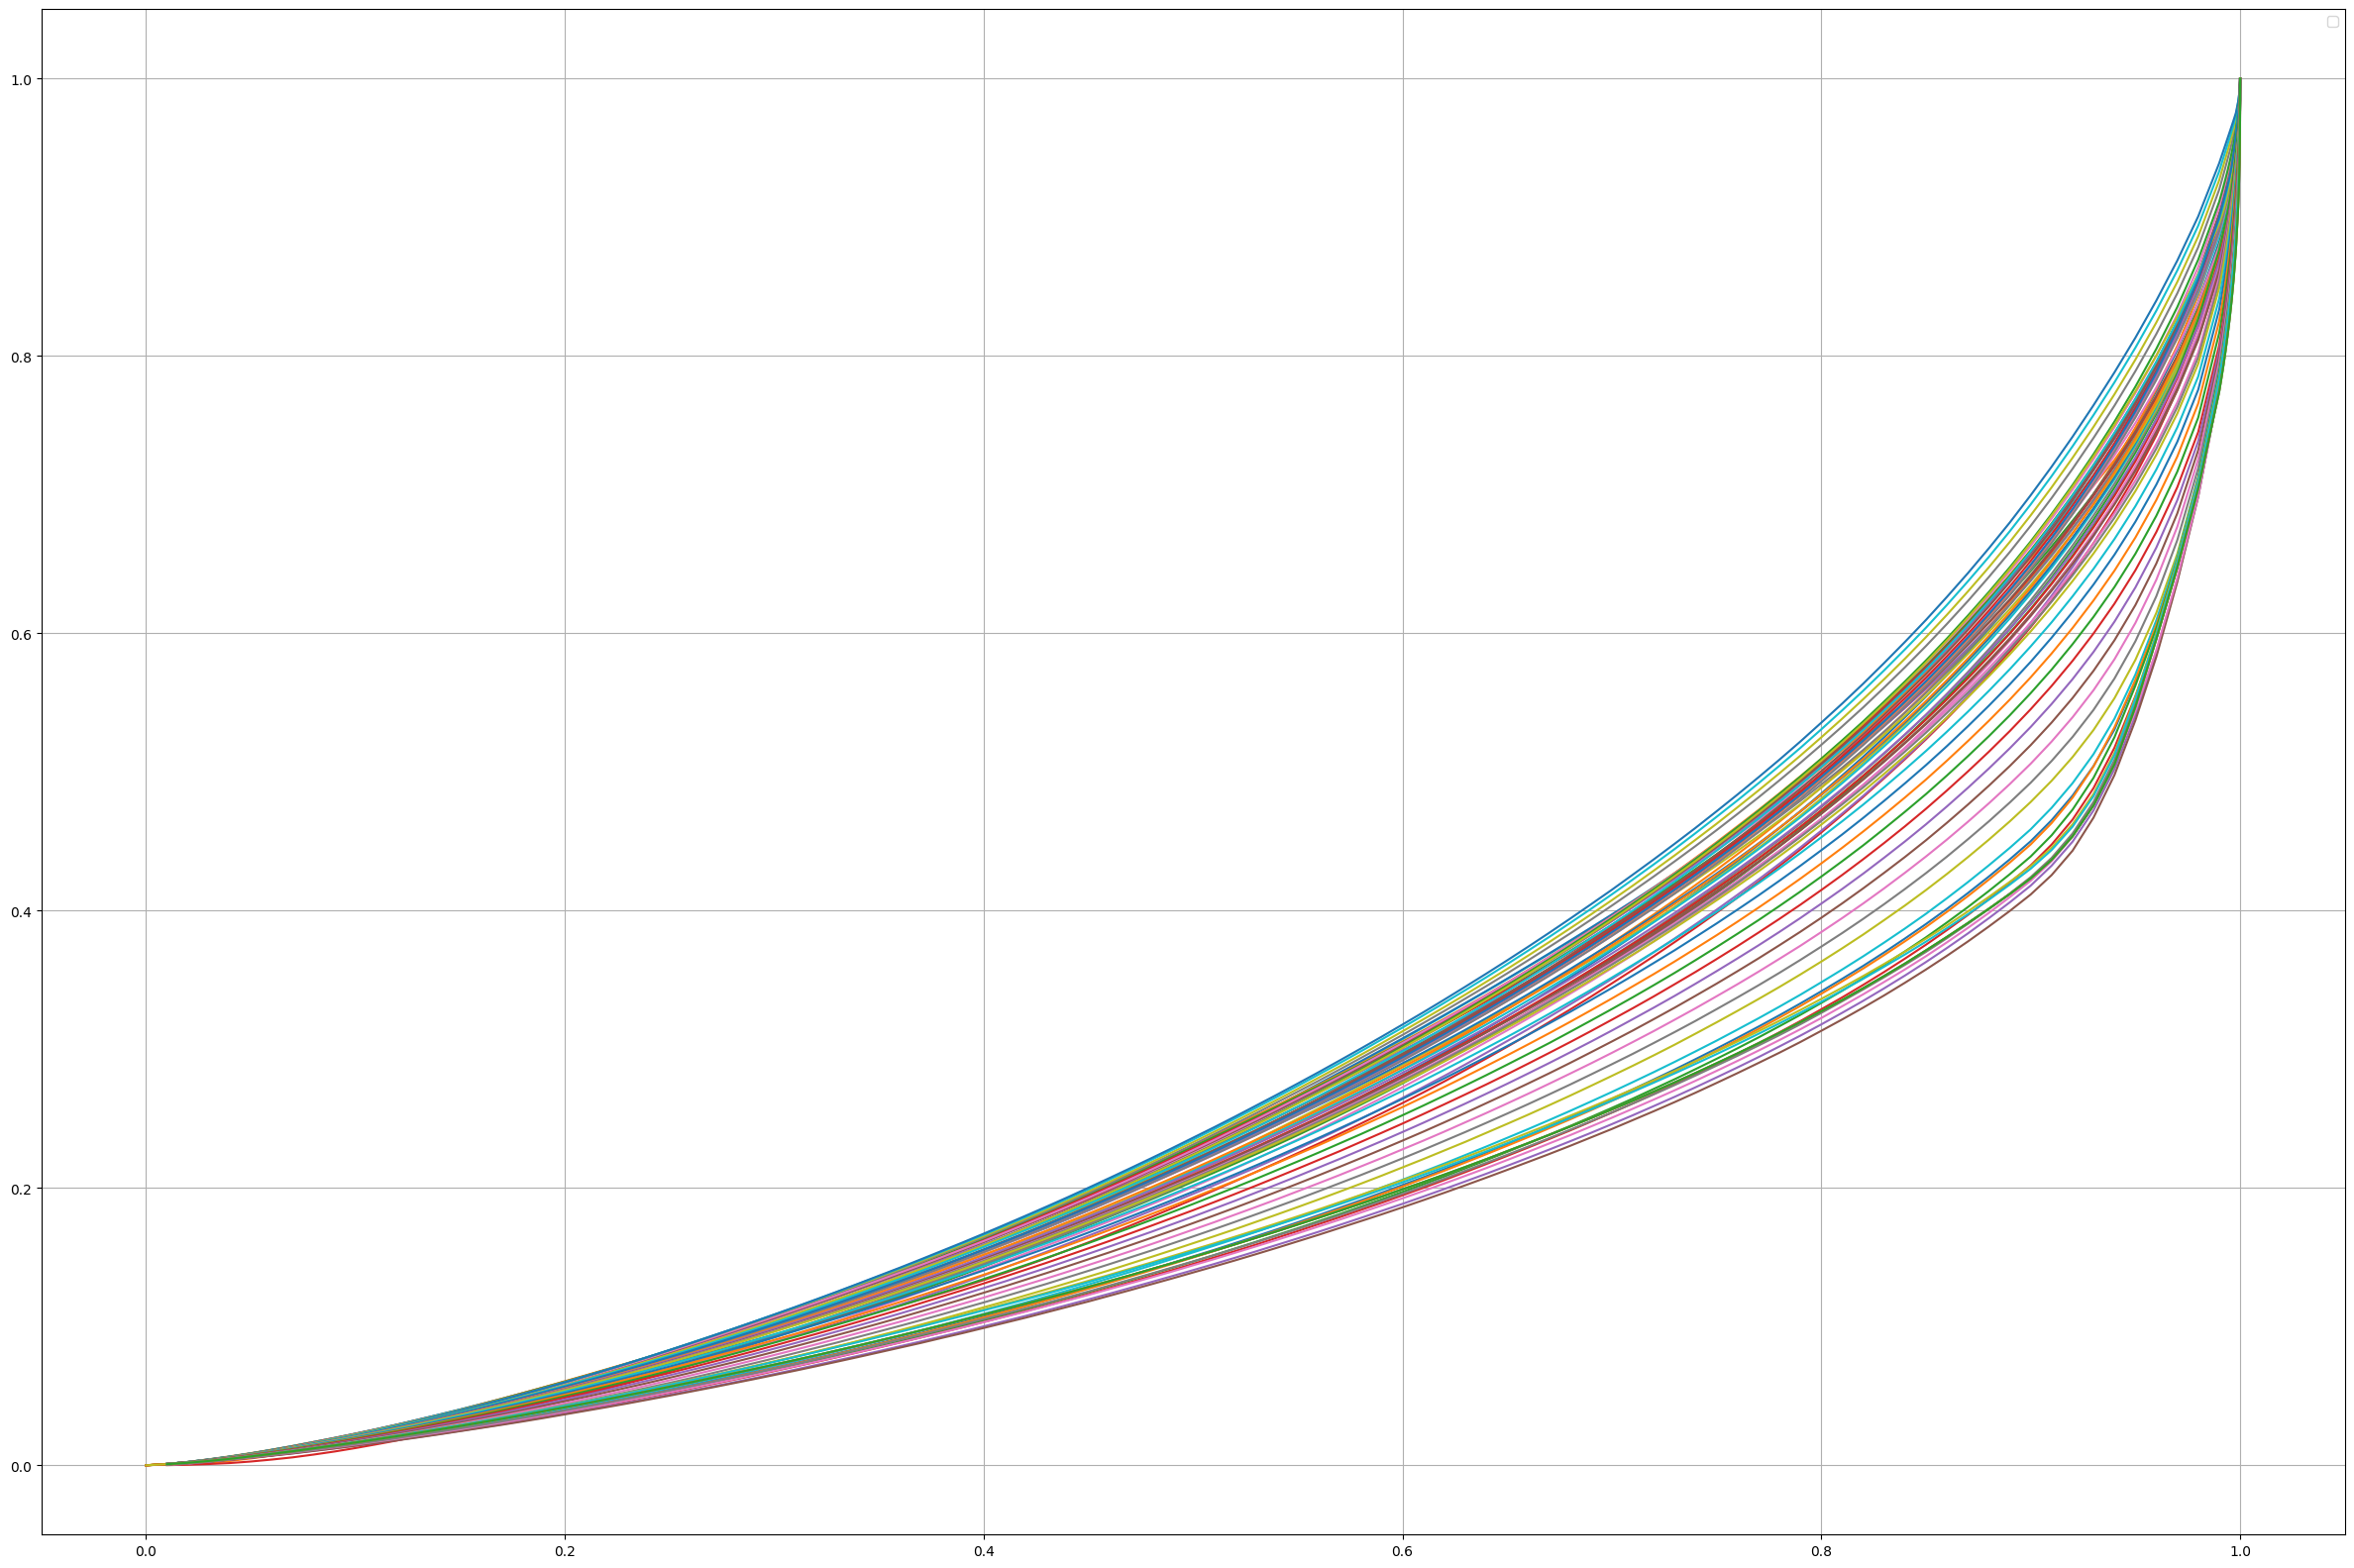

In [36]:
code = 'IN'
plt.figure(figsize=(30,20))
# plot multiple lines for each year
for year in range(1952, 2025):
    df_cnt = lorenz_points[(lorenz_points['country']==code) & (lorenz_points['year']==year)].sort_values('cum_pop')
    plt.plot(df_cnt['cum_pop'], df_cnt['cum_income'])
    plt.legend()
    plt.grid(100)
plt.show()

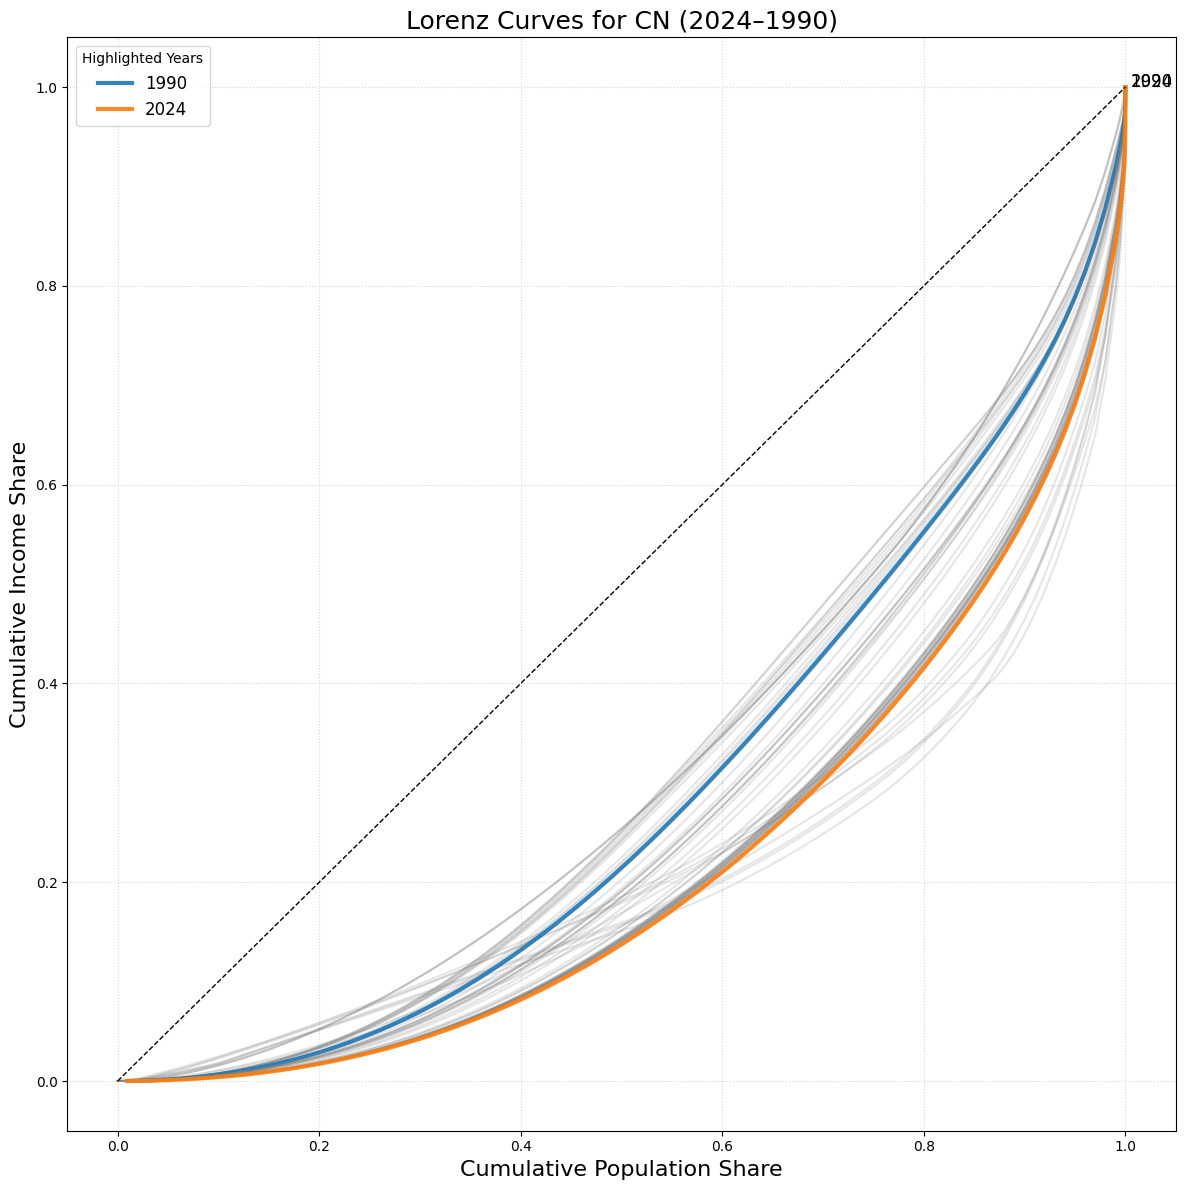

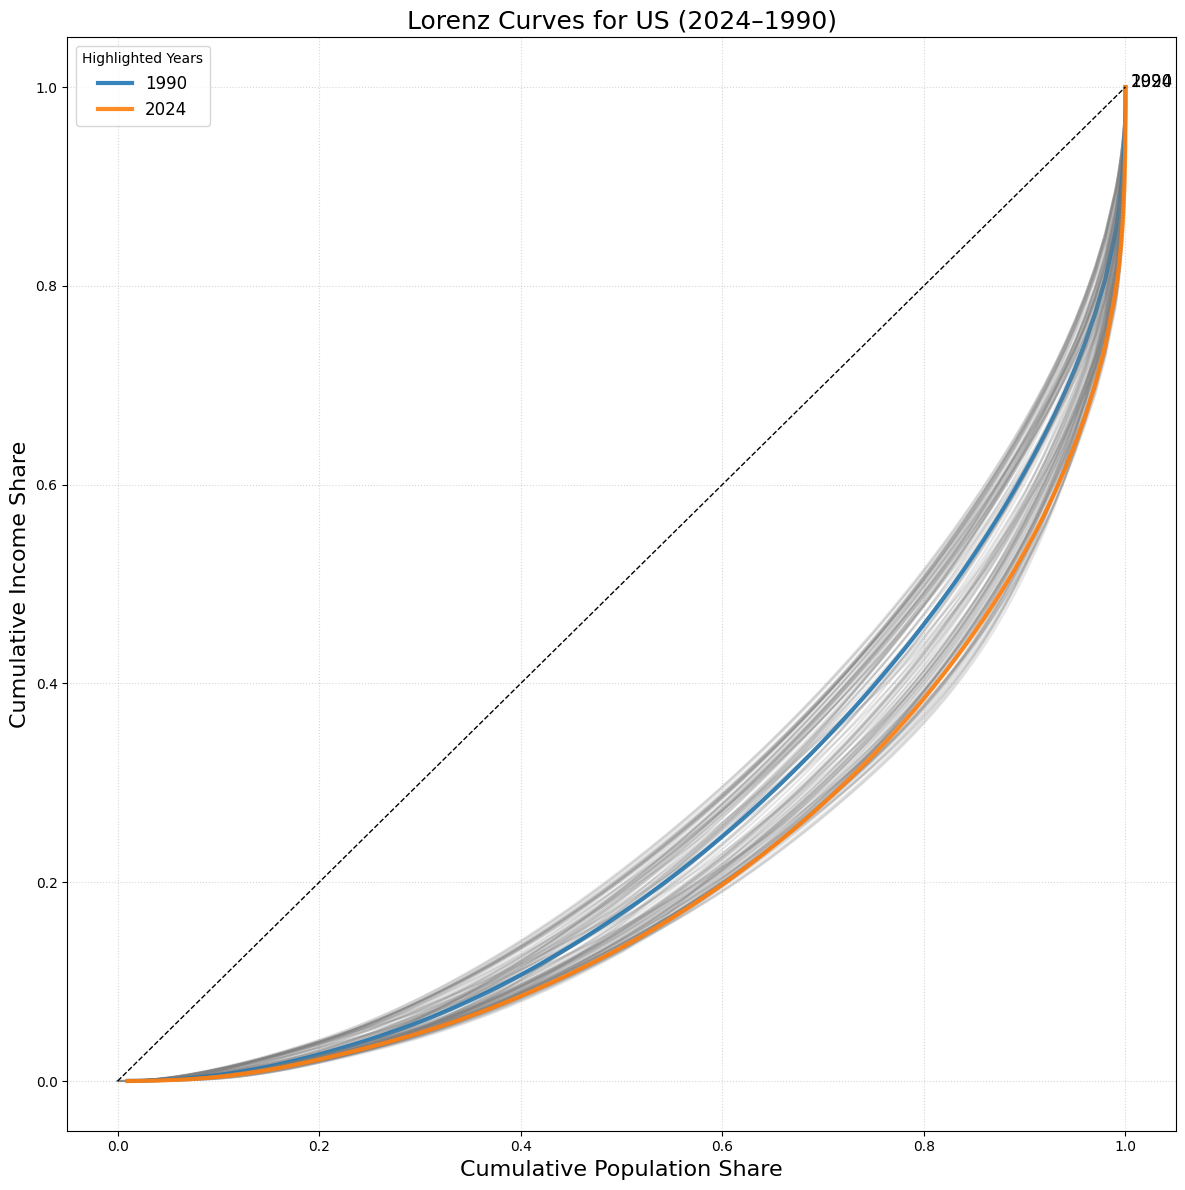

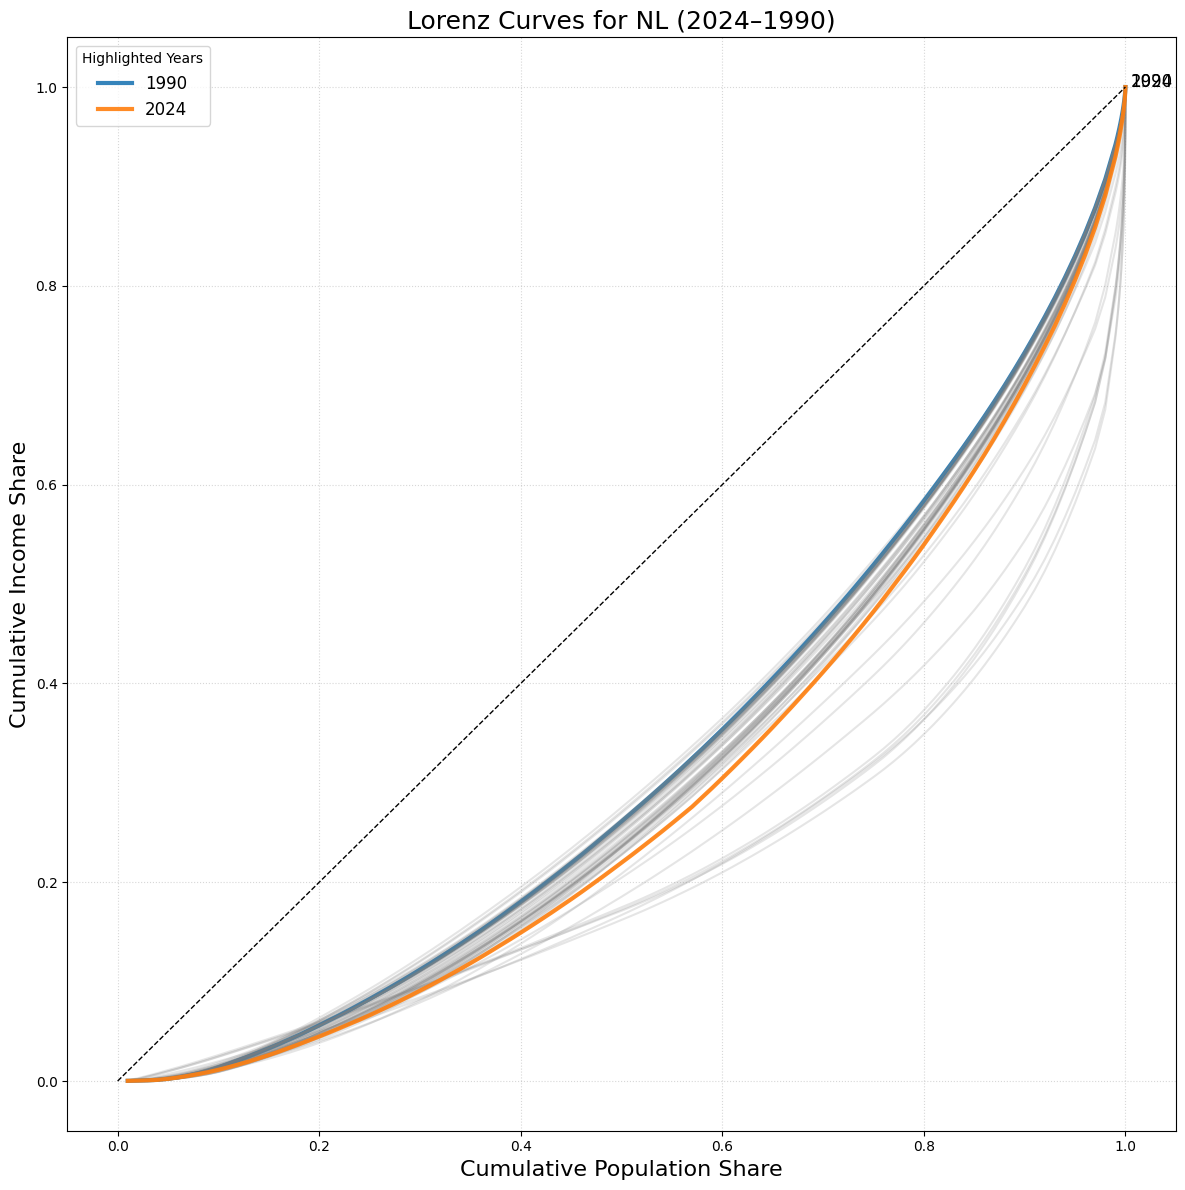

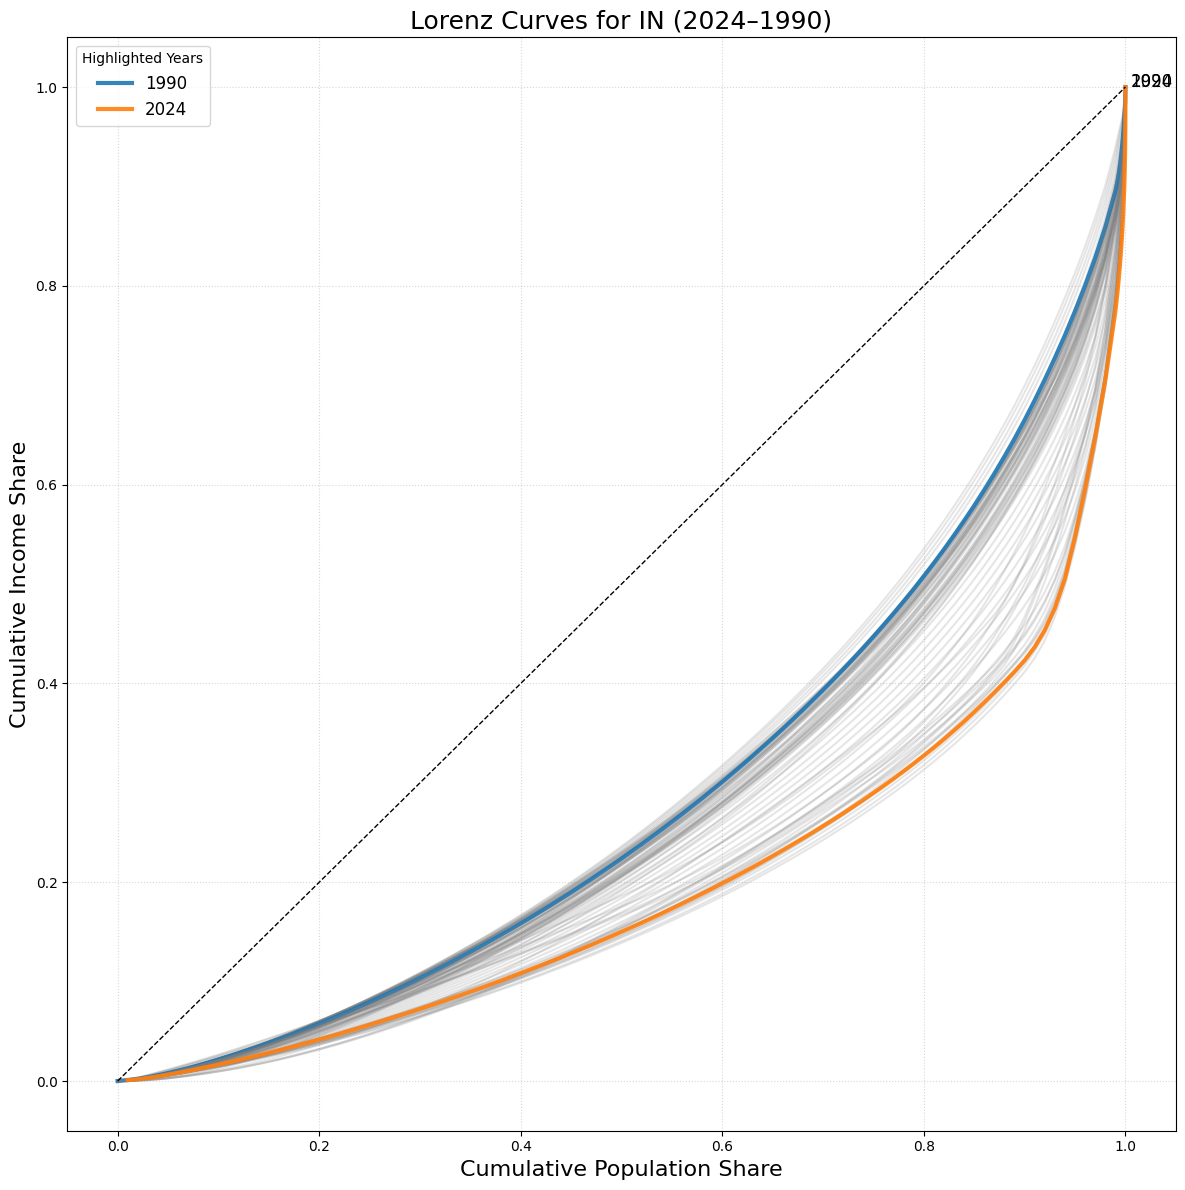

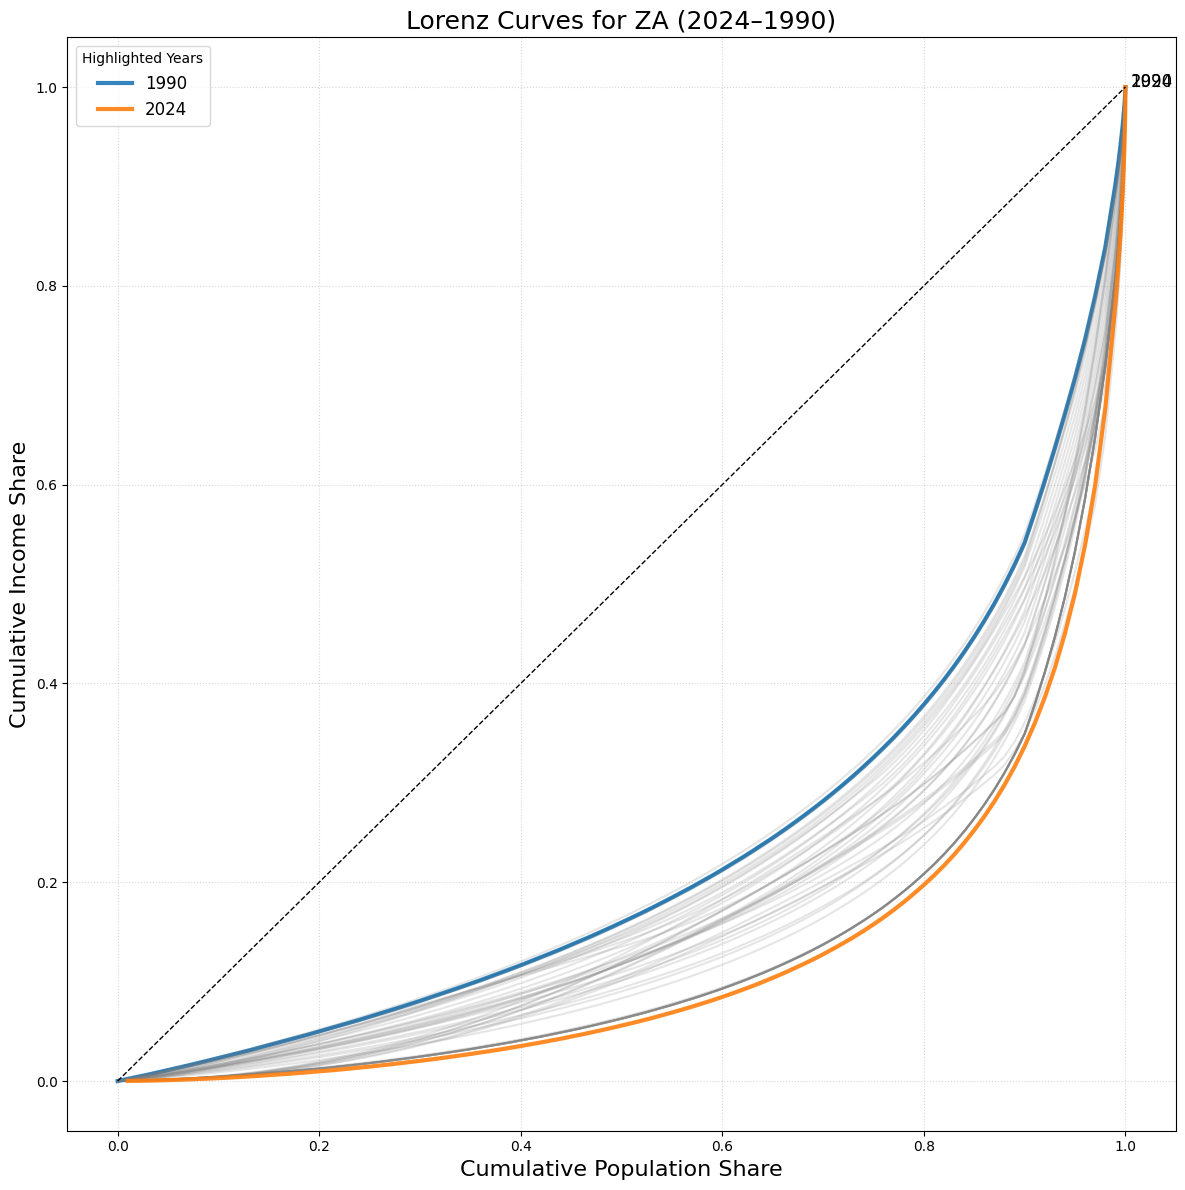

In [73]:
import matplotlib.pyplot as plt
import numpy as np

country_code = ['CN', 'US', 'NL', 'IN', 'ZA']
for code in country_code:

    # Get available years for IN
    years = sorted(lorenz_points[lorenz_points['country_code']==code]['year'].unique())

    # Choose key years to annotate
    first_year = 2024
    last_year = 1990

    plt.figure(figsize=(12,12))

    for year in years:
        df_cnt = lorenz_points[(lorenz_points['country_code']==code) & (lorenz_points['year']==year)]
        df_cnt = df_cnt.sort_values('cum_pop')
        
        # Extremes shown boldly
        if year in [first_year, last_year]:
            plt.plot(df_cnt['cum_pop'], df_cnt['cum_income'], linewidth=3,
                    label=f'{year}', alpha=0.9)
            # Add year label at end of curve
            plt.text(df_cnt['cum_pop'].iloc[-1] + 0.005,
                    df_cnt['cum_income'].iloc[-1],
                    str(year), fontsize=12)
        else:
            # Muted lines for in-between years
            plt.plot(df_cnt['cum_pop'], df_cnt['cum_income'], 
                    color="gray", alpha=0.2)

    # Plot perfect equality line
    plt.plot([0,1], [0,1], linestyle="--", color="black", linewidth=1)

    plt.title(f"Lorenz Curves for {code} ({first_year}–{last_year})", fontsize=18)
    plt.xlabel("Cumulative Population Share", fontsize=16)
    plt.ylabel("Cumulative Income Share", fontsize=16)
    plt.grid(True, linestyle=":", alpha=0.5)
    plt.legend(title="Highlighted Years", fontsize=12)
    plt.tight_layout()
    plt.savefig(f"lorenz_cured_{code}.png")
    plt.show()

In [74]:
from pandas_datareader import data, wb

start_year = 1990
end_year = 2024
countries = ['USA','IND','CHN','BRA','ZAF', 'NLD']  # ISO3 codes accepted
# Indicators dictionary
indicators = {
    'NY.GDP.PCAP.KD': 'gdp_percap_const',
    'SL.UEM.TOTL.ZS': 'unemployment_pct',
    'FP.CPI.TOTL.ZG': 'inflation_pct',
    'NY.GNP.MKTP.CD': 'national_income',
    'NE.TRD.GNFS.ZS': 'trade_openness',
    'SL.TLF.ADVN.ZS': 'education_atainment',
    # 'SE.XPD.TOTL.GD.ZS': 'edu_spend_pct_gdp',
    'NE.TRD.GNFS.ZS': 'trade_pct_gdp',
    'SP.POP.TOTL': 'population'
}

from functools import reduce
frames = []
for code, name in indicators.items():
    print('Downloading', code)
    try:
        # Use wb.download, which is more robust for World Bank data and accepts 'country'
        df = wb.download(indicator=code, country=countries, start=start_year, end=end_year)
        df = df.reset_index() # country and year become columns

        # Rename columns: the indicator code to its friendly name, and 'country' to 'country_name'
        df = df.rename(columns={'country': 'country_name', code: name})

        frames.append(df[['country_name','year', name]])
    except Exception as e:
        print('Failed to fetch', code, ' — ', e)

if frames:
    indicators_df = reduce(lambda left, right: pd.merge(left, right, on=['country_name','year'], how='outer'), frames)
else:
    raise RuntimeError('No data frames fetched. Please download CSVs manually.')

indicators_df.sort_values(['country_name','year'], inplace=True)

/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_12301/2895079595.py:25: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=code, country=countries, start=start_year, end=end_year)
/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_12301/2895079595.py:25: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=code, country=countries, start=start_year, end=end_year)


/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_12301/2895079595.py:25: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=code, country=countries, start=start_year, end=end_year)
/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_12301/2895079595.py:25: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=code, country=countries, start=start_year, end=end_year)


/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_12301/2895079595.py:25: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=code, country=countries, start=start_year, end=end_year)
/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_12301/2895079595.py:25: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=code, country=countries, start=start_year, end=end_year)


/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_12301/2895079595.py:25: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=code, country=countries, start=start_year, end=end_year)


In [75]:
indicators_df['year'] = pd.to_numeric(indicators_df['year'])
country_name_to_code_map = {
    'Brazil': 'BR',
    
    'India': 'IN',
    'United States': 'US',
    'China': 'CN',
    'Netherlands': 'NL',
    'South Africa': 'ZA'
}
indicators_df.rename(columns={'country_name': 'country'}, inplace=True)

indicators_df['country_code'] = indicators_df['country'].replace(country_name_to_code_map)
# indicators_df
print(indicators_df.shape)
indicators_df.head()

(210, 10)


,country,year,gdp_percap_const,unemployment_pct,inflation_pct,national_income,trade_pct_gdp,education_atainment,population,country_code
0,Brazil,1990,6149.867889,NaN,2947.732772,3.747265e+11,15.155599,90.029,149143223,BR
1,Brazil,1991,6107.648837,6.894,432.786662,3.348580e+11,16.592078,NaN,151724256,BR
2,Brazil,1992,5973.982856,7.086,951.962053,3.220009e+11,19.253375,86.302,154275079,BR
3,Brazil,1993,6167.460922,6.030,1927.380790,3.593261e+11,19.599321,NaN,156794577,BR
4,Brazil,1994,6427.169019,6.578,2075.888398,5.051789e+11,18.674760,NaN,159265006,BR


In [76]:
indicators_df['country'].value_counts()

country
Brazil           35
China            35
India            35
Netherlands      35
South Africa     35
United States    35
Name: count, dtype: int64

In [77]:
lorenz_points.rename(columns={'country': 'country_code'}, inplace=True)
df_all = lorenz_points.merge(indicators_df, how='left', on=['country_code', 'year'])
df_all

,country_code,variable,percentile,year,value,age,pop,p_start,p_end,cum_pop,cum_income,country,gdp_percap_const,unemployment_pct,inflation_pct,national_income,trade_pct_gdp,education_atainment,population
0,IN,sptincj999,p0p1,1820,0.0009,999,j,0.0,1.000,0.01000,0.0009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IN,sptincj999,p0p1,1850,0.0007,999,j,0.0,1.000,0.01000,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IN,sptincj999,p0p1,1880,0.0001,999,j,0.0,1.000,0.01000,0.0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IN,sptincj999,p0p1,1900,0.0001,999,j,0.0,1.000,0.01000,0.0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IN,sptincj999,p0p1,1910,0.0007,999,j,0.0,1.000,0.01000,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47046,NL,sptincj999,p0p99.999,2020,0.9992,999,j,0.0,99.999,0.99999,0.9992,Netherlands,47086.580419,3.820,1.272460,9.034783e+11,152.233230,78.973,17441500.0
47047,NL,sptincj999,p0p99.999,2021,0.9991,999,j,0.0,99.999,0.99999,0.9991,Netherlands,49780.844053,4.209,2.675720,1.067276e+12,163.154843,79.378,17533044.0
47048,NL,sptincj999,p0p99.999,2022,0.9991,999,j,0.0,99.999,0.99999,0.9991,Netherlands,51777.543159,3.526,10.001208,1.031120e+12,184.107484,80.316,17700982.0
47049,NL,sptincj999,p0p99.999,2023,0.9992,999,j,0.0,99.999,0.99999,0.9992,Netherlands,51305.628277,3.537,3.838394,1.144728e+12,165.905457,79.885,17877117.0


## Total Wealth distribution 


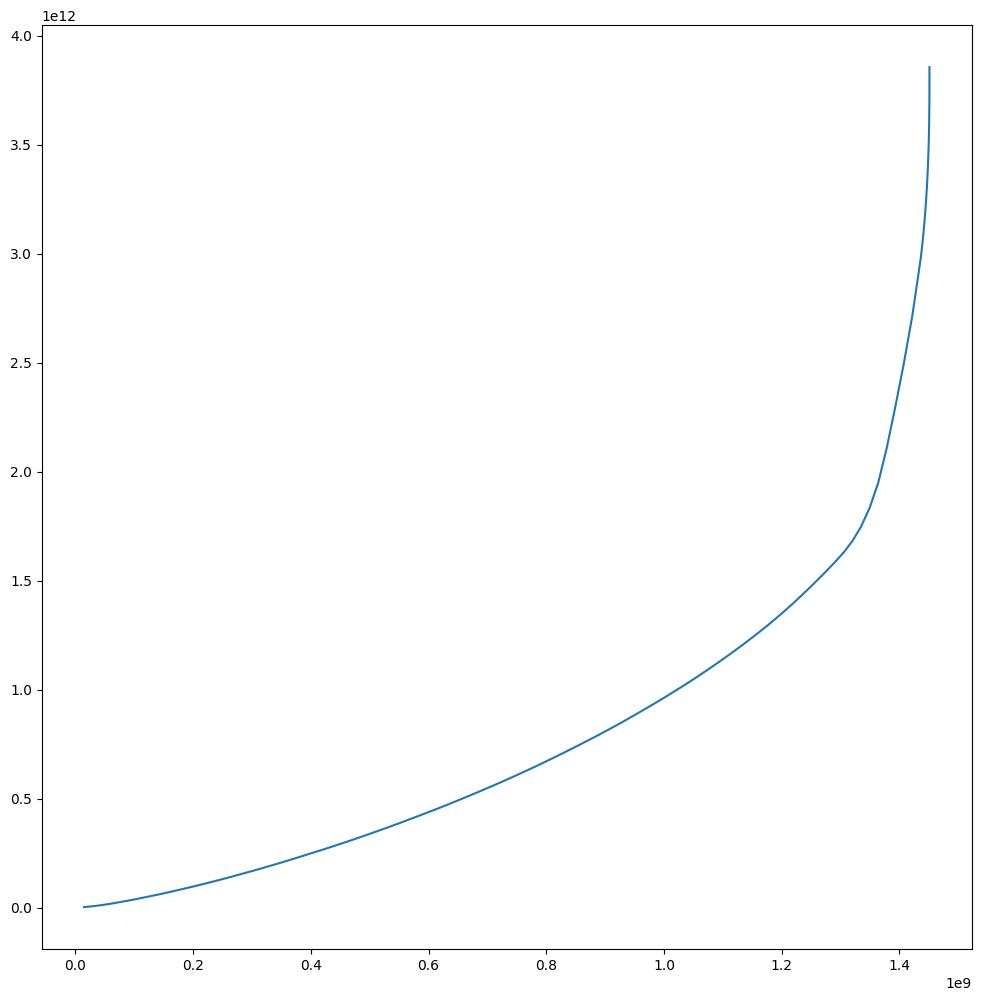

In [78]:
df_all['income_share'] = df_all['cum_income']*df_all['national_income']
df_all['population_share'] = df_all['cum_pop']*df_all['population']
df_all = df_all[df_all['year']>1951]

plt.figure(figsize=(12,12))
# for year in range(1951, 2025):
code = 'IN'
year = 2024
df_in = df_all[(df_all['year']==year) & (df_all['country_code']==code)].sort_values('population_share')
plt.plot(df_in['population_share'], df_in['income_share'])
plt.show()

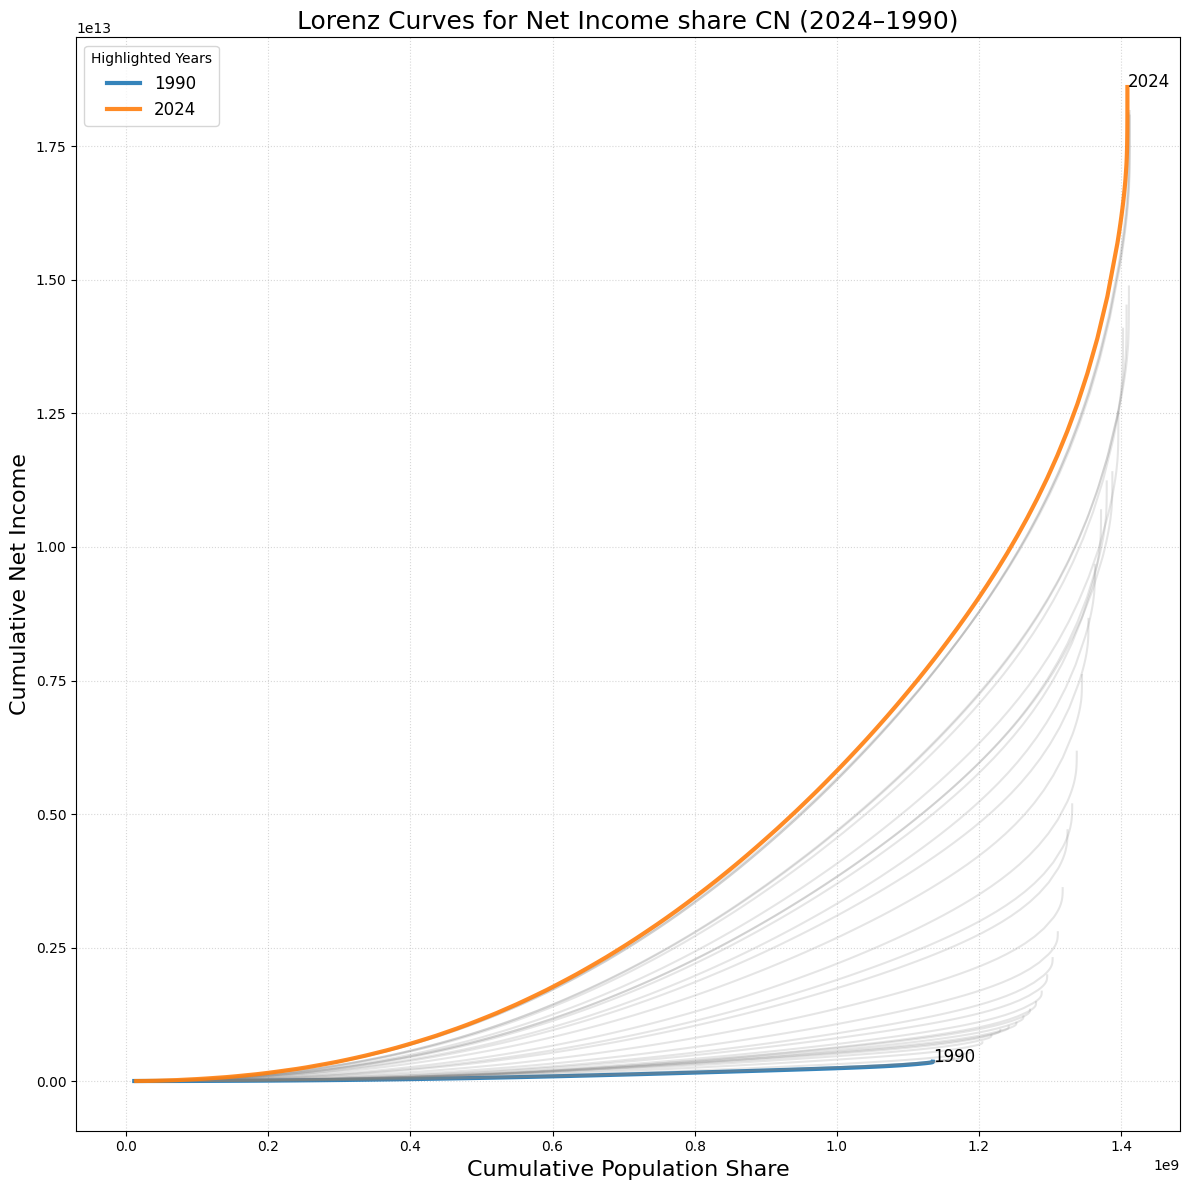

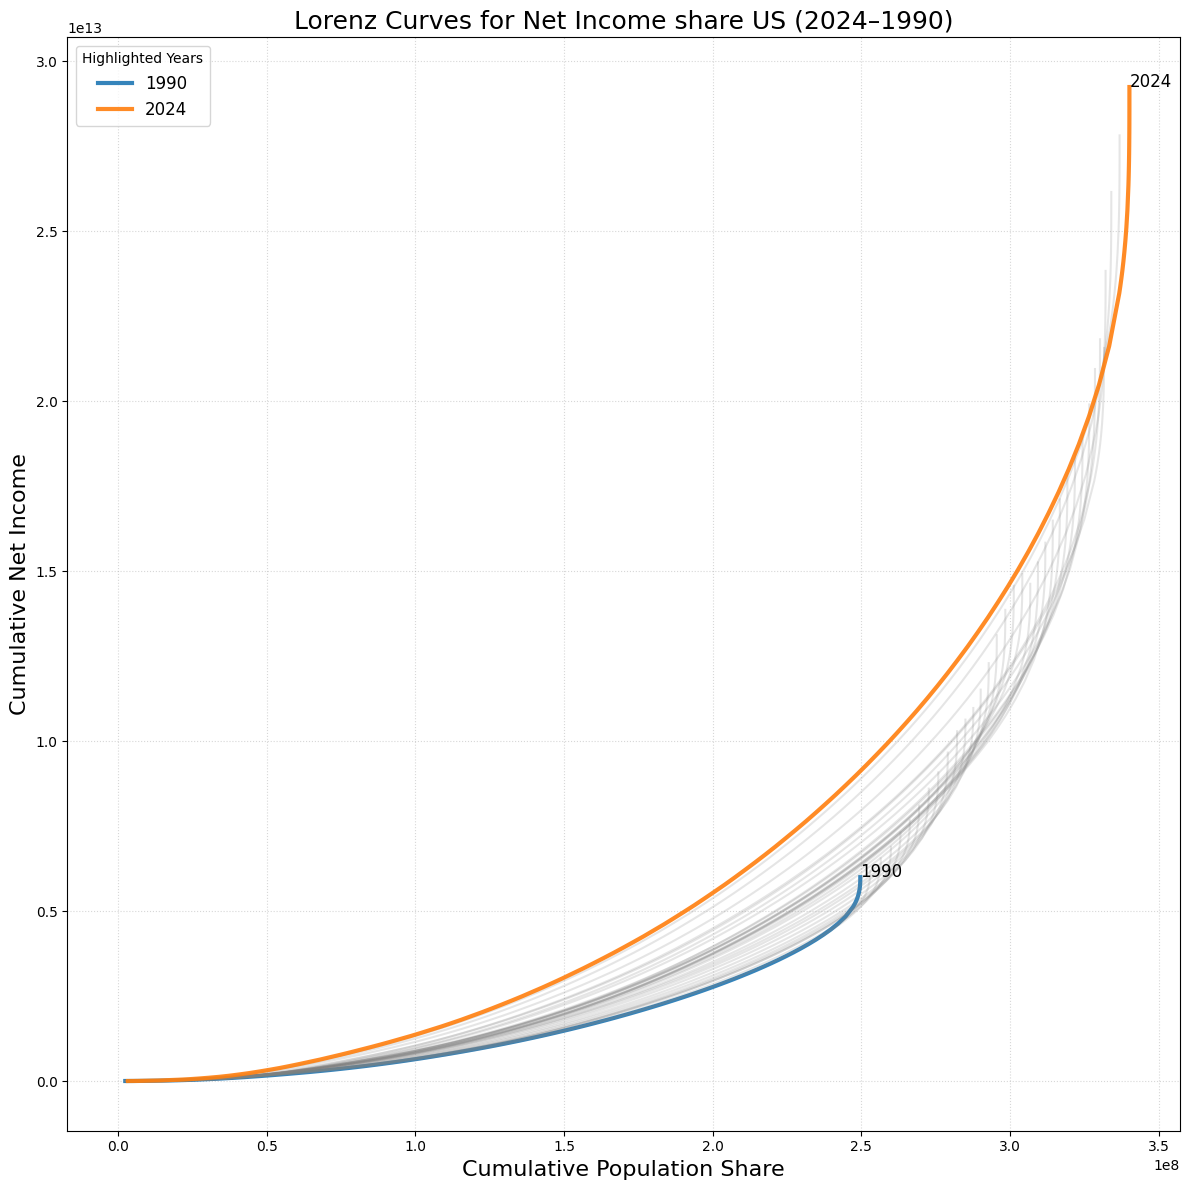

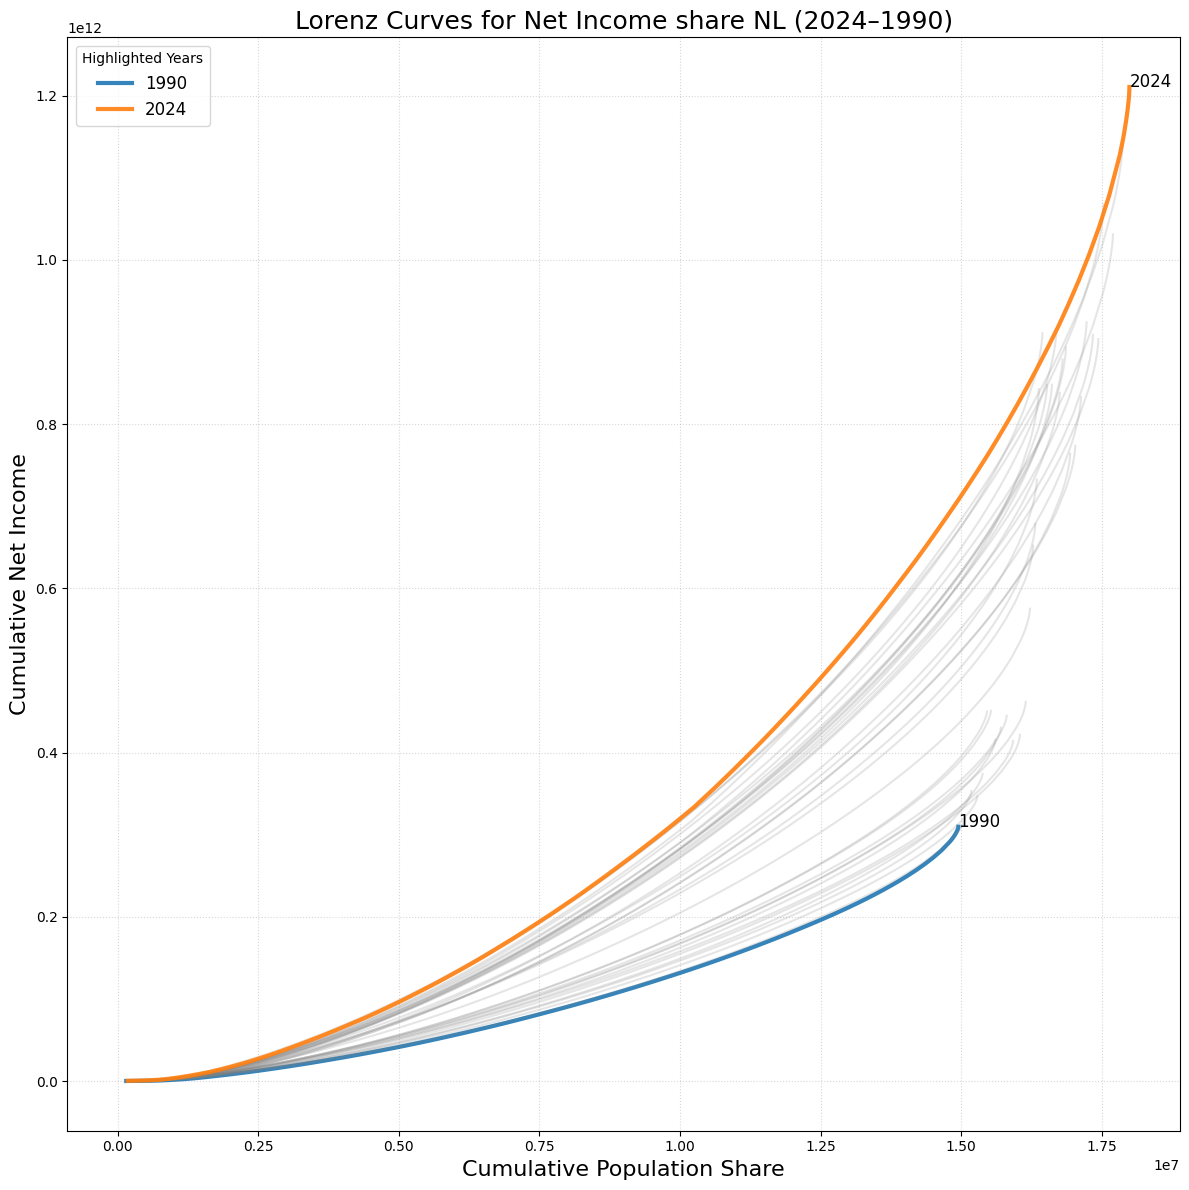

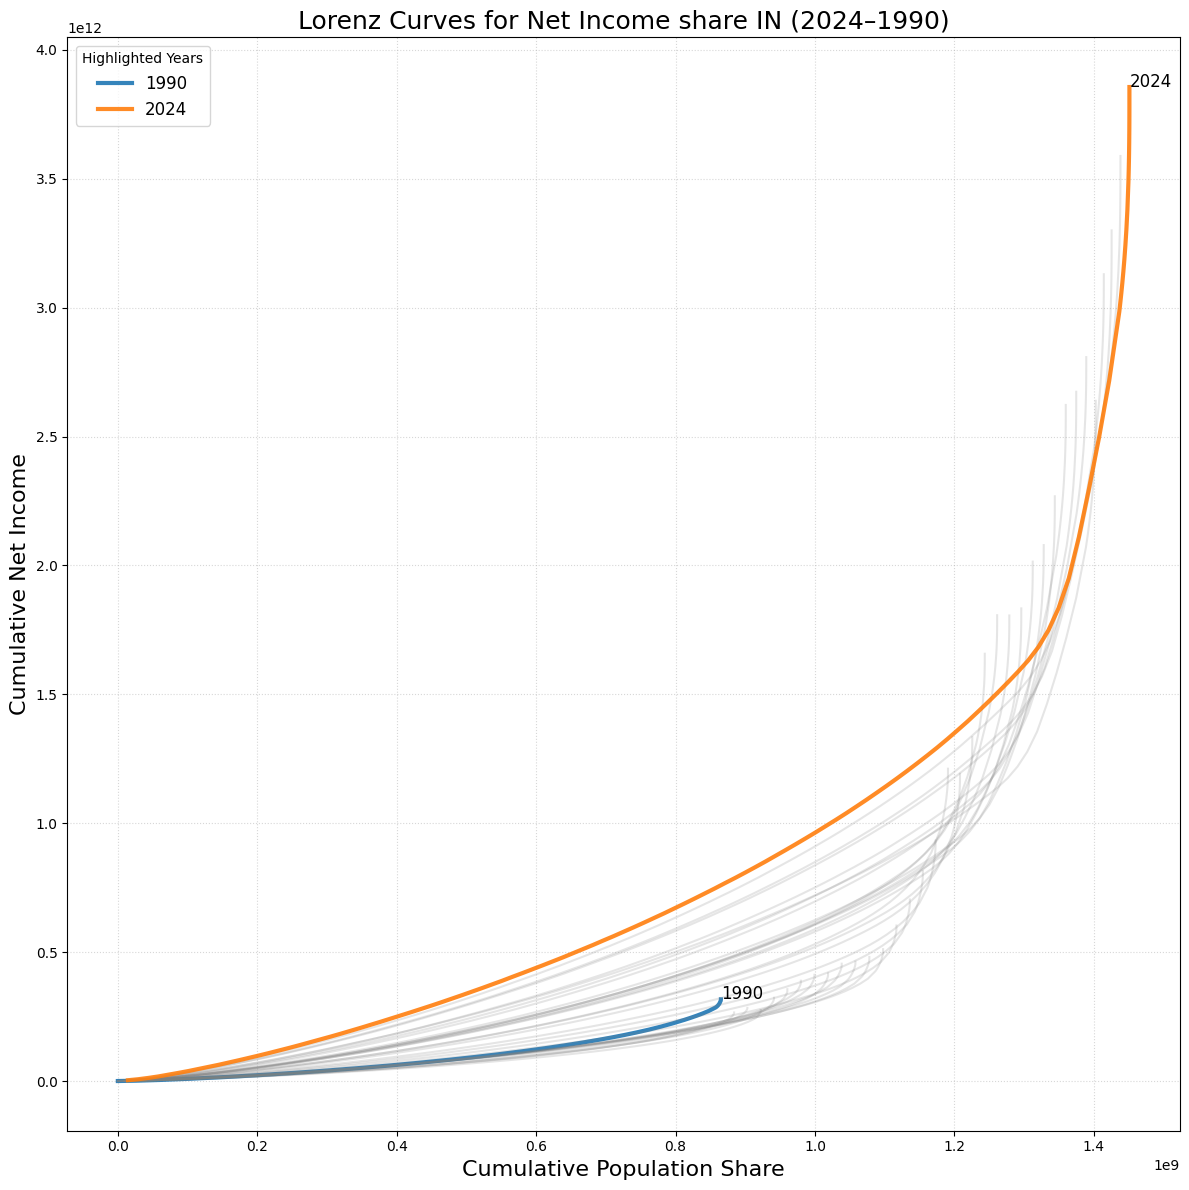

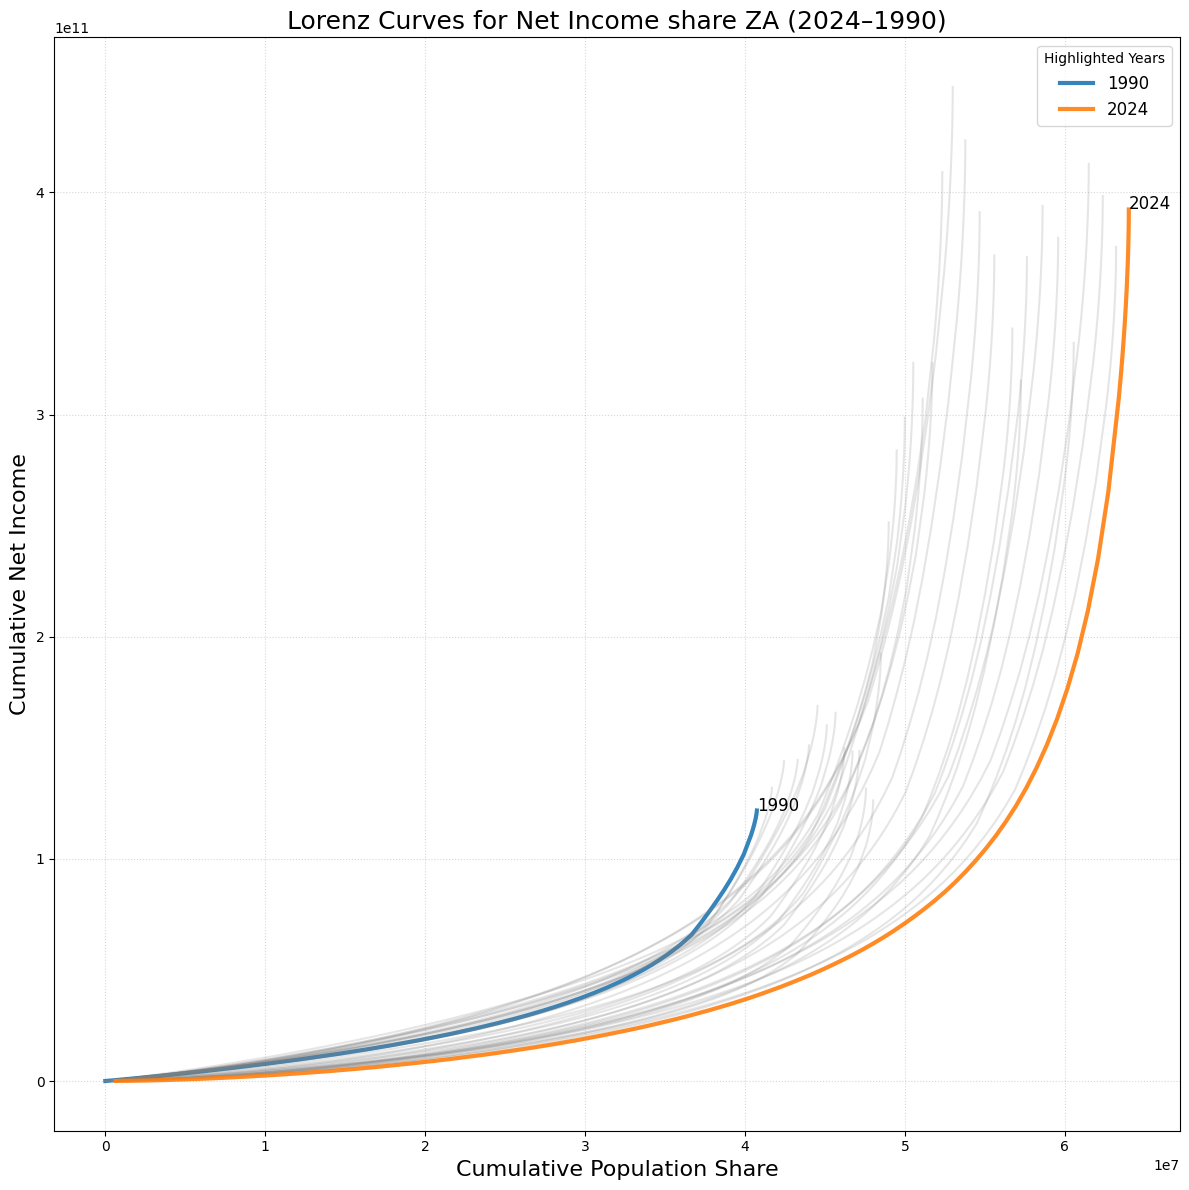

In [79]:
import matplotlib.pyplot as plt
import numpy as np

country_code = ['CN', 'US', 'NL', 'IN', 'ZA']
for code in country_code:

    # Get available years for IN
    years = sorted(df_all[df_all['country_code']==code]['year'].unique())

    # Choose key years to annotate
    first_year = 2024
    last_year = 1990

    plt.figure(figsize=(12,12))

    for year in years:
        df_cnt = df_all[(df_all['country_code']==code) & (df_all['year']==year)]
        df_cnt = df_cnt.sort_values('population_share')
        
        # Extremes shown boldly
        if year in [first_year, last_year]:
            plt.plot(df_cnt['population_share'], df_cnt['income_share'], linewidth=3,
                    label=f'{year}', alpha=0.9)
            # Add year label at end of curve
            plt.text(df_cnt['population_share'].iloc[-1] + 0.005,
                    df_cnt['income_share'].iloc[-1],
                    str(year), fontsize=12)
        else:
            # Muted lines for in-between years
            plt.plot(df_cnt['population_share'], df_cnt['income_share'], 
                    color="gray", alpha=0.2)

    # Plot perfect equality line
    plt.plot([0,1], [0,1], linestyle="--", color="black", linewidth=1)

    plt.title(f"Lorenz Curves for Net Income share {code} ({first_year}–{last_year})", fontsize=18)
    plt.xlabel("Cumulative Population Share", fontsize=16)
    plt.ylabel("Cumulative Net Income", fontsize=16)
    plt.grid(True, linestyle=":", alpha=0.5)
    plt.legend(title="Highlighted Years", fontsize=12)
    plt.tight_layout()
    plt.savefig(f"Net_Income_share_cured_{code}.png")
    plt.show()

In [58]:
df_all[(df_all['year']==2024) & (df_all['country_code']==code)]

,country_code,variable,percentile,year,value,age,pop,p_start,p_end,cum_pop,...,country,gdp_percap_const,unemployment_pct,inflation_pct,national_income,trade_pct_gdp,education_atainment,population,income_share,population_share
82,IN,sptincj999,p0p1,2024,0.0008,999,j,0.0,1.000,0.01000,...,India,2396.712719,4.202,4.953036,3.856153e+12,44.671093,65.309,1.450936e+09,3.084922e+09,1.450936e+07
165,IN,sptincj999,p0p10,2024,0.0164,999,j,0.0,10.000,0.10000,...,India,2396.712719,4.202,4.953036,3.856153e+12,44.671093,65.309,1.450936e+09,6.324091e+10,1.450936e+08
248,IN,sptincj999,p0p100,2024,1.0000,999,j,0.0,100.000,1.00000,...,India,2396.712719,4.202,4.953036,3.856153e+12,44.671093,65.309,1.450936e+09,3.856153e+12,1.450936e+09
331,IN,sptincj999,p0p11,2024,0.0187,999,j,0.0,11.000,0.11000,...,India,2396.712719,4.202,4.953036,3.856153e+12,44.671093,65.309,1.450936e+09,7.211006e+10,1.596029e+08
414,IN,sptincj999,p0p12,2024,0.0210,999,j,0.0,12.000,0.12000,...,India,2396.712719,4.202,4.953036,3.856153e+12,44.671093,65.309,1.450936e+09,8.097922e+10,1.741123e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10228,IN,sptincj999,p0p99.995,2024,0.9656,999,j,0.0,99.995,0.99995,...,India,2396.712719,4.202,4.953036,3.856153e+12,44.671093,65.309,1.450936e+09,3.723501e+12,1.450863e+09
10311,IN,sptincj999,p0p99.996,2024,0.9680,999,j,0.0,99.996,0.99996,...,India,2396.712719,4.202,4.953036,3.856153e+12,44.671093,65.309,1.450936e+09,3.732756e+12,1.450878e+09
10394,IN,sptincj999,p0p99.997,2024,0.9708,999,j,0.0,99.997,0.99997,...,India,2396.712719,4.202,4.953036,3.856153e+12,44.671093,65.309,1.450936e+09,3.743553e+12,1.450892e+09
10477,IN,sptincj999,p0p99.998,2024,0.9743,999,j,0.0,99.998,0.99998,...,India,2396.712719,4.202,4.953036,3.856153e+12,44.671093,65.309,1.450936e+09,3.757050e+12,1.450907e+09


In [60]:
import pandas as pd
import requests
from io import StringIO

def get_total_national_income(country_code):
    url = (
        "https://wid.world/data/data.csv?"
        f"indicator=mnninc999i&areas={country_code}&years=1950:2024"
    )

    # If you still have SSL issues, add verify=False (but it's optional)
    resp = requests.get(url)  # or requests.get(url, verify=False)
    
    # Quick sanity check
    print("HTTP status:", resp.status_code)
    text = resp.text
    
    # If it starts with '<' it's probably HTML (error page)
    print("First 200 chars:\n", text[:200])
    
    # Now parse as CSV
    df = pd.read_csv(StringIO(text))
    
    # Keep just what we need and rename
    df = df[['country', 'year', 'value']].rename(columns={'value': 'total_national_income'})
    return df

df_in = get_total_national_income("IN")
print(df_in.head())
print(df_in.tail())





HTTP status: 404
First 200 chars:
 <!DOCTYPE html>
<html lang="en-US" class="no-js">
<head>
  <link rel="stylesheet" type="text/css" href="//cdnjs.cloudflare.com/ajax/libs/cookieconsent2/3.0.3/cookieconsent.min.css" />
  <script src="/


ParserError: Error tokenizing data. C error: Expected 1 fields in line 12, saw 8
